In [11]:
!pip3 install scikit-learn --break-system-packages

  Using cached scipy-1.15.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 60.3 MB/s eta 0:00:00
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp313-cp313-macosx_14_0_arm64.whl (22.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)


In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score


In [13]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic exploration
print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)
print("Class distribution:", np.bincount(y))


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]


In [25]:
# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Show first 5 rows
print("\nSample data:")
print(df.head())

# Show class distribution
print("\nClass distribution:")
print(df['target'].value_counts())


Sample data:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target

In [26]:
# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
#Implement KNN
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []
print("***KNN***")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k}: Accuracy = {acc:.4f}")


***KNN***
K=1: Accuracy = 0.9444
K=5: Accuracy = 0.9444
K=11: Accuracy = 0.9444
K=15: Accuracy = 0.9722
K=21: Accuracy = 0.9444


In [35]:
#Implement RNN
radius_values = [350,400,450,500,600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=2)
    try:
        rnn.fit(X_train, y_train)
        y_pred = rnn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
    except ValueError as e:
        acc = 0
        print(f"Radius={radius} caused an error: {e}")
    rnn_accuracies.append(acc)
    print(f"Radius={radius}: Accuracy = {acc:.4f}")


Radius=350: Accuracy = 0.3889
Radius=400: Accuracy = 0.3889
Radius=450: Accuracy = 0.3889
Radius=500: Accuracy = 0.3889
Radius=600: Accuracy = 0.3889


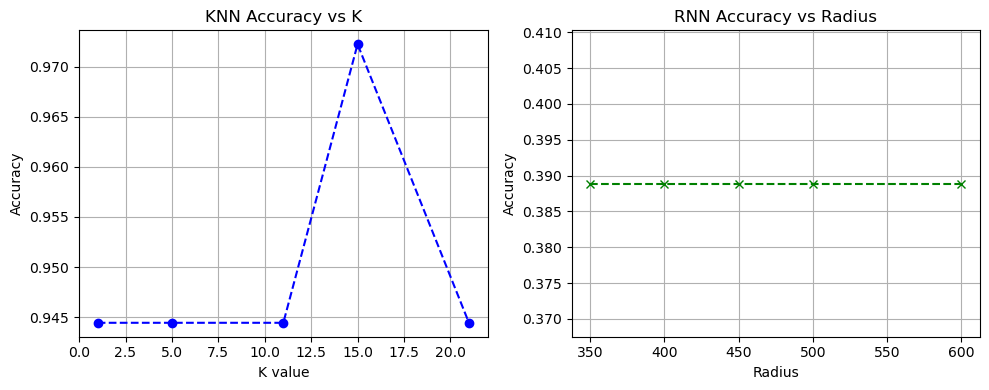

In [33]:
# Plot for KNN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', linestyle='--', color='b')
plt.title("KNN Accuracy vs K")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot for RNN
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='x', linestyle='--', color='g')
plt.title("RNN Accuracy vs Radius")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()
